# SEABORN 

## THERE ARE MAINLY 5 KINDS OF PLOTS 
     1.DISTRIBUTION PLOTS
     2.CATEGORICAL PLOTS
     3.MATRIX PLOTS
     4.SCATTER PLOTS
     5.REGRESSION PLOTS
     

## DISTRIBUTION PLOTS
     THESE ARE MAINLY USED WHEN WE WANT TO FIND HOW ACTUAL DATA IS DISTRUBUTED OR SPREAD AROUND DATASET
     MAINLY USED FOR NUMERICAL VALUES
     
     IT HAS FOLLOWING PLOTS
     1.distplot
     2.jointplot
     3.pairplot
     4.rugplot
     5.kdeplot
     

In [2]:
# import seaborn and define the figures to be in the same notebook
import seaborn as sns
%matplotlib inline

# WE USE INBUILT DATASET FOR DISTRIBUTION PLOTS

In [4]:
# loading the dataset
tips = sns.load_dataset('tips')
# peek at the data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set or single variable of observations.

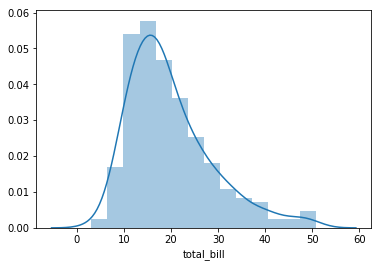

In [7]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings



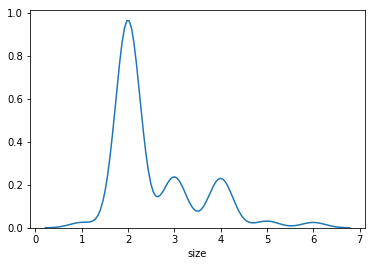

In [8]:
sns.distplot(tips['size'],hist=False)

To remove the kde layer and just have the histogram use:

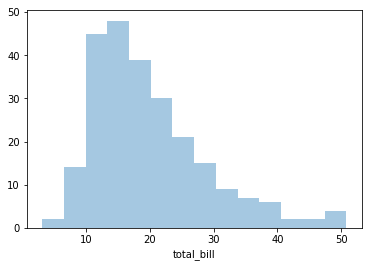

In [15]:
sns.distplot(tips['total_bill'],kde=False)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data or for comparing two variables. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

## INTERPRETING SCATTER PLOT
    1.if the data shows an uphill pattern from left to right then it indicates positive relationship 
    2.if the data shows an downhill pattern from left to right then it indicates negative relationship 
    3.if the data doesnt show anything then no relationship

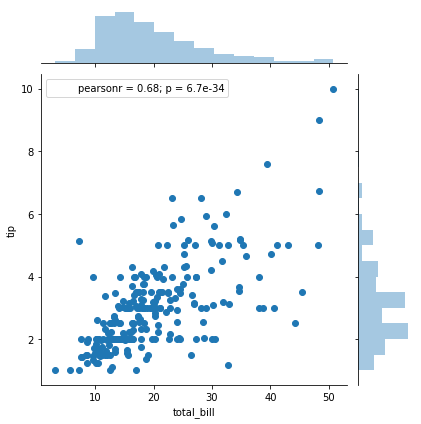

In [11]:
# using scatter plot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')


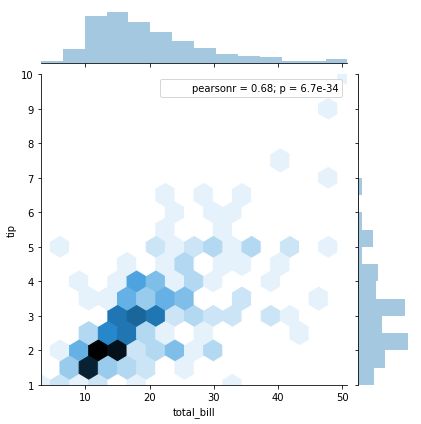

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

Its similar to joinplot that it makes for every combination of attributes present in the dataframe

Pair plot is the easiest way to visualize your data however if our dataset is large then it takes a lot of time

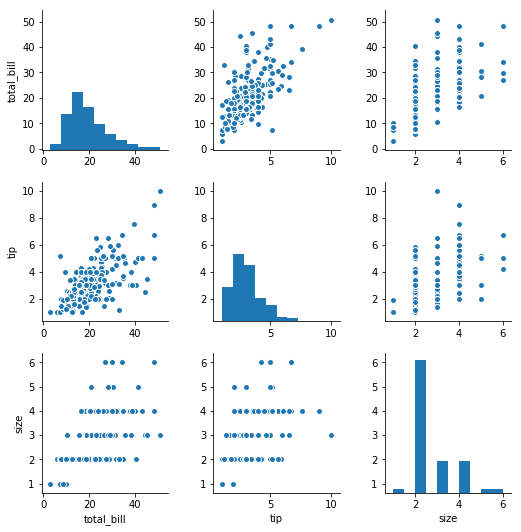

In [14]:
# just for numerical data
sns.pairplot(tips)
# for categorical data we can add hue parameter and pass it the column name
#sns.pairplot(tips,hue='sex')

# diagonal elements are marginal probability distributions
# upper and lower triangular elements are joint probability distributions

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0, 1)

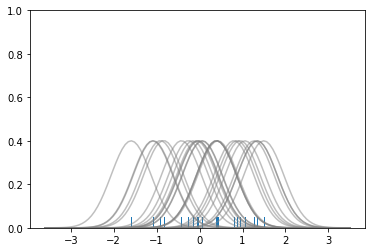

In [43]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

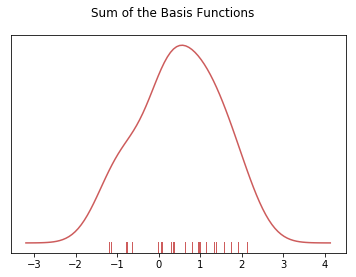

In [16]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

## IF ITS OVERWHELMING DONT WORRY YOU WILL UNDERSTAND AS YOU START APPLYING TO REAL WORLD DATASETS
    
    

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through some of them

## boxplot and violinplot

boxplots and violinplots are used to show the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

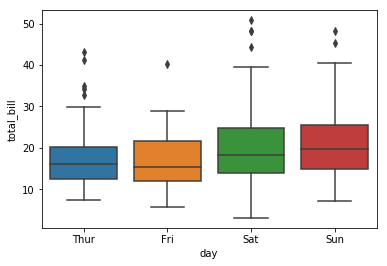

In [17]:
# simple box plot
sns.boxplot(x="day", y="total_bill", data=tips)
# box plot with hue
#sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

## violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

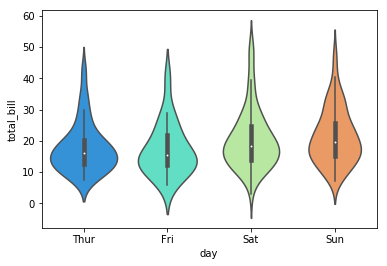

In [18]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

## MATRIX PLOTS
    Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data


In [24]:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

HeatMap is basically used for finding correlation between the data and most effective visualization for such categorical data


![alt text](d3.png "Title")

In [33]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


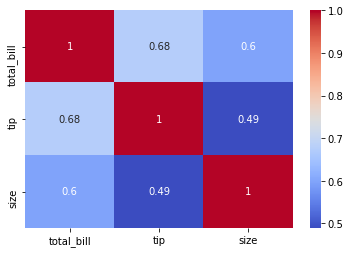

In [21]:
# pass the matrix of correlation 
#sns.heatmap(tips.corr())
# add annot parameter to get numbers inside blocks to be more visually appealing
#sns.heatmap(tips.corr(),annot=True)
# add cmap parameter to get beautiful color maps I prefer coolwarm
sns.heatmap(tips.corr(),annot=True,cmap='coolwarm')

## Q. HOW TO PLOT FLIGHTS DATA


### ANS: 
           1.CREATE THE MATRIX FORM OF DATA USING PANDAS LIB
           2.CREATE INDEX FOR DATAFRAME
           3.TRY PLOTTING THE INDEXED DATA

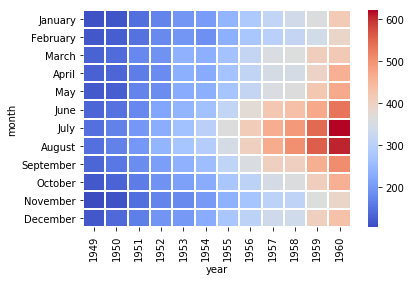

In [26]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
#pvflights.head()
sns.heatmap(pvflights,cmap='coolwarm',linewidth=1,linecolor='white')

## REGRESSION PLOTS
     Seaborn has many built-in capabilities for regression plots.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

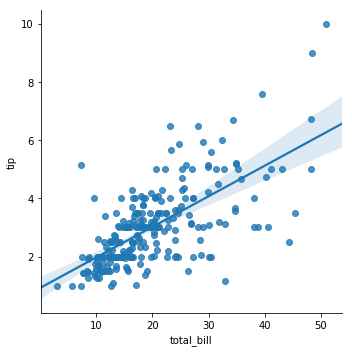

In [45]:
# simple linear regression plot
sns.lmplot(x='total_bill',y='tip',data=tips)

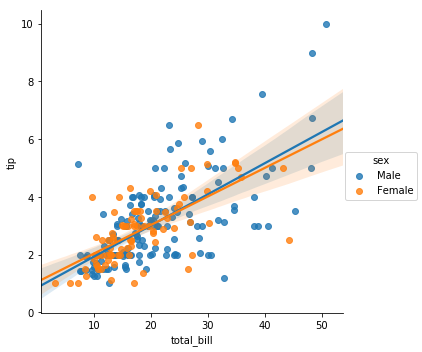

In [46]:
# linear regression plot with hue parameter
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

## GEOGRAPHICAL PLOTTING
    1.This is Bit challenging as there are different forms of data
    2.We will focus on Plotly for plotting graphs
    3.Matplotlib also has a basemap extension
    
    If u havent installed install it using the command as given below
    conda install plotly


# Choropleth Maps
## Offline Plotly Usage

Get imports and set everything up to be working offline.

In [27]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Now set up everything so that the figures show up in the notebook:

In [28]:
init_notebook_mode(connected=True) 

More info on other options for Offline Plotly usage can be found [here](https://plot.ly/python/offline/).

## Choropleth US Maps

Plotly's mapping can be a bit hard to get used to at first, remember to reference the cheat sheet in the data visualization folder, or [find it online here](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf).

In [29]:
import pandas as pd

Now we need to begin to build our data dictionary. Easiest way to do this is to use the **dict()** function of the general form:

* type = 'choropleth',
* locations = list of states
* locationmode = 'USA-states'
* colorscale= 

Either a predefined string:

    'pairs' | 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' | 'Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'

or create a [custom colorscale](https://plot.ly/python/heatmap-and-contour-colorscales/)

* text= list or array of text to display per point
* z= array of values on z axis (color of state)
* colorbar = {'title':'Colorbar Title'})

Here is a simple example:

In [31]:
data = dict(type = 'choropleth',
            locations = ['AZ','CA','NY'],
            locationmode = 'USA-states',
            colorscale= 'Portland',
            text= ['text1','text2','text3'],
            z=[1.0,2.0,3.0],
            colorbar = {'title':'Colorbar Title'})
# you can change text to actual location names

Then we create the layout nested dictionary:

In [32]:
layout = dict(geo = {'scope':'usa'})

Then we use: 

    go.Figure(data = [data],layout = layout)
    
to set up the object that finally gets passed into iplot()

In [34]:
choromap = go.Figure(data = [data],layout = layout)

In [36]:
iplot(choromap)

### Real Data US Map Choropleth Exercise

Now let's show an example with some real data as well as some other options we can add to the dictionaries in data and layout.

The name of the dataset that you should load is '2011_US_AGRI_Exports' and its a csv file provided in Data Visualization Folder

# World Choropleth Map

Now let's see an example with a World Map:

In [37]:
df = pd.read_csv('2014_World_GDP')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [40]:
data = dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorbar = {'title' : 'GDP Billions US'},
      ) 

In [41]:
layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'stereographic'}
    )
)

In [42]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

## THERE ARE LOT OF DIFFERENT PLOT WE COVERED MOST OF THE IMPORTANT PLOTS REQUIRED FOR MACHINE LEARNING
## FINALLY YOU DID IT

# FURTHER READING AND EXPLORATION
   1.http://www.dataquest.io
   2.http://www.datacamp.com
   3.Data Analysis with Python(O'Reilly) Book (best for beginners)
   4.http://seaborn.pydata.org
   5.http://matplotlib.pyplot.org
   